In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


Data Collection and Processing

In [24]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv("loan_data.csv")
loan_dataset.head(10) # printing first 10 rows of the loan data set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [25]:
# number of total rows and columns
loan_dataset.shape

(367, 12)

In [26]:
loan_dataset.isnull().sum() # checking null values in loan dataset

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [27]:
loan_dataset.drop_duplicates(inplace = True)
loan_dataset.shape

(367, 12)

In [31]:
# Removes rows where 'Gender' column has missing values
loan_dataset = loan_dataset.dropna(subset=["Gender"])

loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [32]:
loan_dataset["Credit_History"]= loan_dataset["Credit_History"].fillna(0)
loan_dataset["Self_Employed"] = loan_dataset["Self_Employed"].fillna("No")
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [33]:
loan_dataset.dropna(inplace=True)
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [34]:
loan_dataset.shape

(337, 12)

In [35]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [54]:
loan_dataset["Dependents"].value_counts()

dtype('O')

In [50]:
# data label encoding replacing the value of 3+ to 4
loan_dataset.replace(to_replace="3+", value=4, inplace= True)

In [51]:
loan_dataset["Dependents"].value_counts()

Dependents
0    188
2     59
1     52
4     38
Name: count, dtype: int64

# Data Visulization

In [52]:
loan_dataset.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            Int64
Loan_Amount_Term      Int64
Credit_History        Int64
Property_Area        object
dtype: object

In [56]:
loan_dataset["LoanAmount"] = loan_dataset["LoanAmount"].astype('int')
loan_dataset["Loan_Amount_Term"] = loan_dataset["Loan_Amount_Term"].astype('int')
loan_dataset["Dependents"] = loan_dataset["Dependents"].astype('int')

loan_dataset["Credit_History"] = loan_dataset["Credit_History"].astype('int')

In [57]:
loan_dataset.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents            int64
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area        object
dtype: object

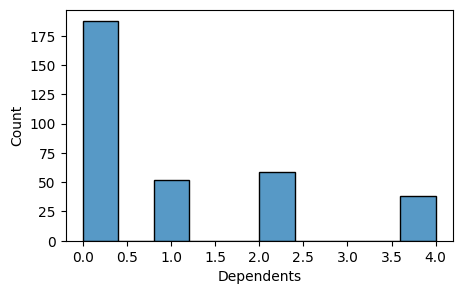

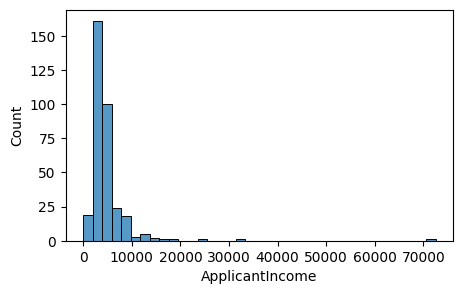

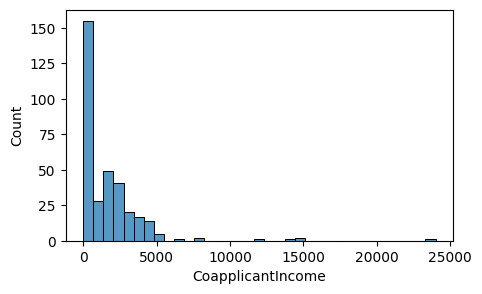

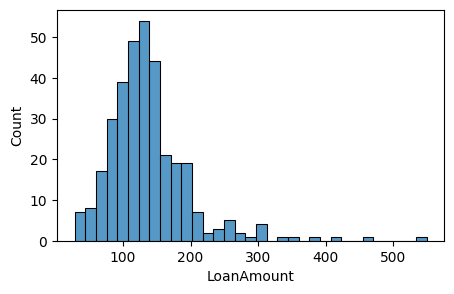

In [58]:
numeric_columns = ["Dependents",	"ApplicantIncome",	"CoapplicantIncome",	"LoanAmount"]
for col in numeric_columns:
    plt.figure(figsize=(5,3))
    sns.histplot(loan_dataset[col])
    

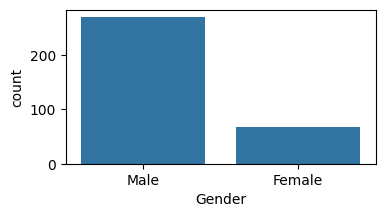

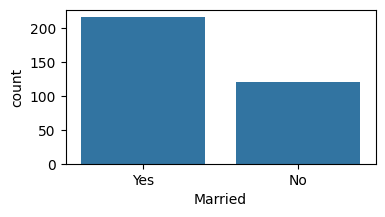

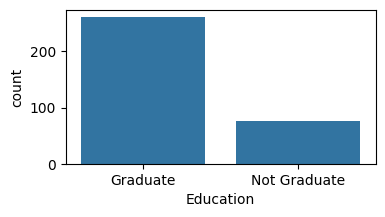

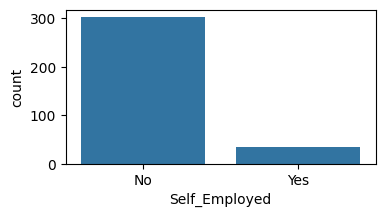

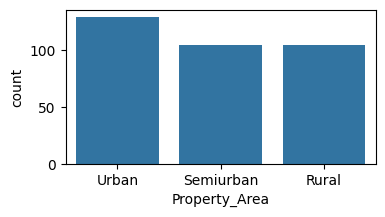

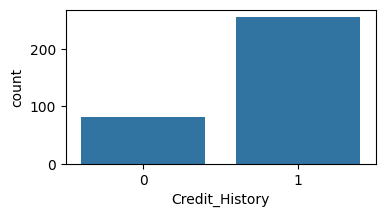

In [42]:
# Education by 
categrical_columns = ["Gender",	"Married",	"Education",	"Self_Employed", "Property_Area", "Credit_History"]
for col in categrical_columns:
    plt.figure(figsize=(4,2))
    sns.countplot(x=loan_dataset[col])

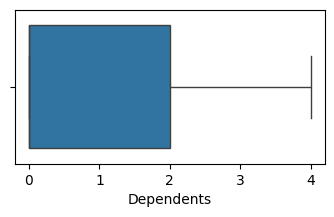

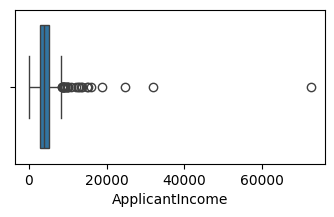

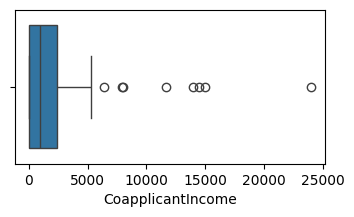

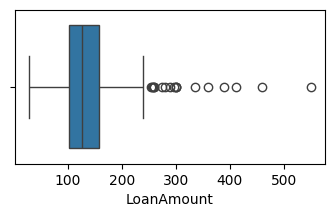

In [59]:
for col in numeric_columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=loan_dataset[col])

<Axes: >

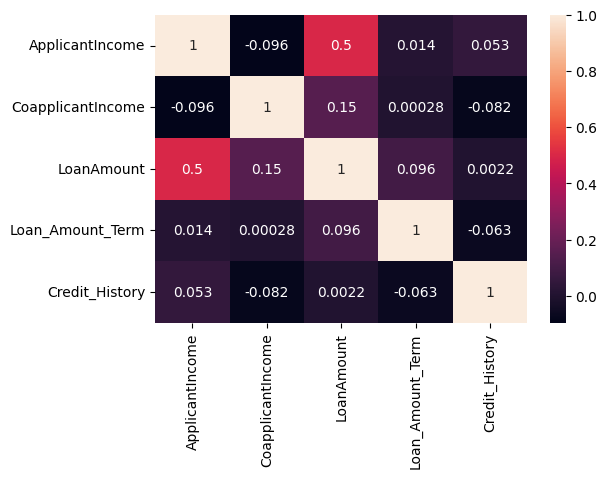

In [45]:
plt.figure(figsize=(6,4))
sns.heatmap(loan_dataset.corr(numeric_only=True), annot=True)

In [46]:
loan_dataset["TotalIncome"] = loan_dataset["ApplicantIncome"] + loan_dataset["CoapplicantIncome"]
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,0,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban,3276


In [47]:
loan_dataset["LoanToIncomeRatio"] = loan_dataset["LoanAmount"] / (loan_dataset["TotalIncome"] + 1)
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanToIncomeRatio
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban,5720,0.019227
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban,4576,0.027529
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban,6800,0.030584
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,0,Urban,4886,0.020462
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban,3276,0.023802


In [48]:
loan_dataset["Loan_Status"] = (
        (loan_dataset["Credit_History"] == 1) &
        (loan_dataset["LoanToIncomeRatio"] < 0.35)
    ).astype(int)

<Axes: >

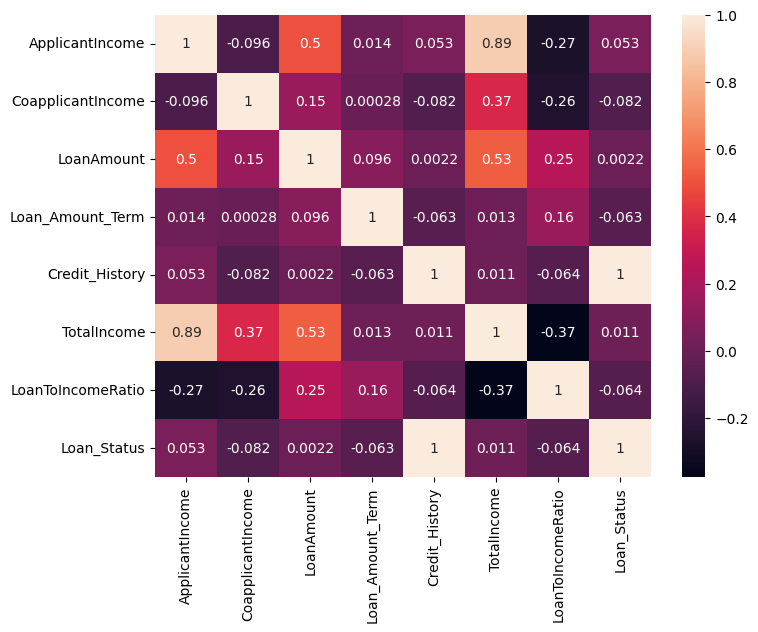

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(loan_dataset.corr(numeric_only=True), annot=True)

In [51]:
# convert categorical columns to numerical values
loan_dataset.replace({"Married":{"No":0, "Yes":1},
                      "Gender":{"Male":1, "Female":0}, 
                      "Self_Employed": {"No":0, "Yes":1},
                     "Property_Area": {"Rural":0, "Semiurban": 1, "Urban":2},
                     "Education": {"Graduate": 1, "Not Graduate": 0}}, inplace = True)
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanToIncomeRatio,Loan_Status
0,LP001015,1,1,0,1,0,5720,0,110,360,1,2,5720,0.019227,1
1,LP001022,1,1,1,1,0,3076,1500,126,360,1,2,4576,0.027529,1
2,LP001031,1,1,2,1,0,5000,1800,208,360,1,2,6800,0.030584,1
3,LP001035,1,1,2,1,0,2340,2546,100,360,0,2,4886,0.020462,0
4,LP001051,1,0,0,0,0,3276,0,78,360,1,2,3276,0.023802,1
5,LP001054,1,1,0,0,1,2165,3422,152,360,1,2,5587,0.027201,1
6,LP001055,0,0,1,0,0,2226,0,59,360,1,1,2226,0.026493,1
7,LP001056,1,1,2,0,0,3881,0,147,360,0,0,3881,0.037867,0
8,LP001059,1,1,2,1,0,13633,0,280,240,1,2,13633,0.020537,1
9,LP001067,1,0,0,0,0,2400,2400,123,360,1,1,4800,0.02562,1


In [52]:
loan_dataset.rename(columns={
    "Gender": "Is_Male",
    "Married": "Is_Married",
    "Education": "Is_Graduate"
}, inplace=True)
loan_dataset.head()

,Loan_ID,Is_Male,Is_Married,Dependents,Is_Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanToIncomeRatio,Loan_Status
0,LP001015,1,1,0,1,0,5720,0,110,360,1,2,5720,0.019227,1
1,LP001022,1,1,1,1,0,3076,1500,126,360,1,2,4576,0.027529,1
2,LP001031,1,1,2,1,0,5000,1800,208,360,1,2,6800,0.030584,1
3,LP001035,1,1,2,1,0,2340,2546,100,360,0,2,4886,0.020462,0
4,LP001051,1,0,0,0,0,3276,0,78,360,1,2,3276,0.023802,1


In [53]:
# separating the data and label
X = loan_dataset.drop(columns=["Loan_ID", "Loan_Status"], axis=1)
Y = loan_dataset["Loan_Status"]
print(X)
print(Y)

     Is_Male  Is_Married Dependents  Is_Graduate  Self_Employed  \
0          1           1          0            1              0   
1          1           1          1            1              0   
2          1           1          2            1              0   
3          1           1          2            1              0   
4          1           0          0            0              0   
..       ...         ...        ...          ...            ...   
362        1           1          4            0              1   
363        1           1          0            1              0   
364        1           0          0            1              0   
365        1           1          0            1              0   
366        1           0          0            1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0         110               360   
1               3076               1500         1

In [54]:
# Train test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)


(337, 13) (269, 13) (68, 13)


In [ ]:
# Train the Model using Support Vector Machine Model

In [55]:
classifier = svm.SVC(kernel="linear")


In [59]:
classifier.fit(X_train, Y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [57]:
# Model Evalution
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on training data:", training_data_accuracy)

Accuracy on training data: 0.9591078066914498


In [61]:
# Model Evalution
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on testing data:", test_data_accuracy)

Accuracy on testing data: 0.9705882352941176
